## Countries Clustering Assignment

#### Introduction 
    A Programming assignment to build a clustering model using two different clustering algorithm (K-means and Hierarchical) to  categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then suggest the countries which the CEO of HELP International is an international humanitarian NGO which he needs to focus on the most.

### Problem Statement
The company wants to know:

- Which countires are in most dire need of help based on some socio-economic an health factors.
- How to divide these countries and into how many groups to categorize them

### Steps for building and validating the model
    1 Data Preparation
    2 Model Building 
    3 Final Analysis


## 1. Data preparation

In [683]:
# Importing the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### 1.1 Reading and Understanding the dataset

In [684]:
# read the 
df = pd.read_csv("Country-data.csv", sep=",", encoding="ISO-8859-1", header=0)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [685]:
# checking the shape of the country data
df.shape

(167, 10)

In [686]:
# This shows that we have data from 167 countries

In [687]:
# basic information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [688]:
# Chekcing for null values
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [689]:
# It seems there are no null values in the dataset

### 1.2 Outlier treatment
Now lets see if there are any outliers in the dataset or not

The outliers that we are going to remove will be domain specific ouliers As we want to cluster or focus more on the socio-economically and health condition backwards country we will try to remove the more developed countries i.e the countries on the upper end of the spectrum. So in this context very highly developed (in all the standards) countries can be considered as the 
 

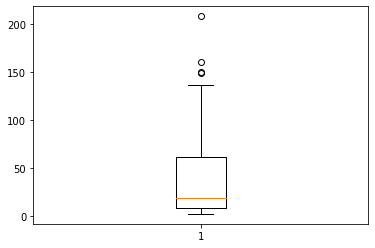

In [690]:
# child_mort
plt.boxplot(df['child_mort'])
plt.savefig('child_mort.png')
plt.show()

In [691]:
# Lets see the child_mort columns with countries having very low value of it.(lower end outliers)
# As we can see that the countries having child mortality of less than 5 are also doing very good in the other
# socio-economic and health parameters so for this analysis should be treated as outliers

df[df['child_mort'] < 6].sort_values("child_mort", ascending="True")

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800
77,Japan,3.2,15.0,9.49,13.6,35800,-1.900,82.8,1.39,44500
135,Slovenia,3.2,64.3,9.41,62.9,28700,-0.987,79.5,1.57,23400
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800


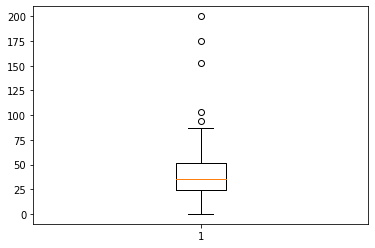

In [692]:
# exports
plt.boxplot(df['exports'])
plt.savefig('exports.png')
plt.show()

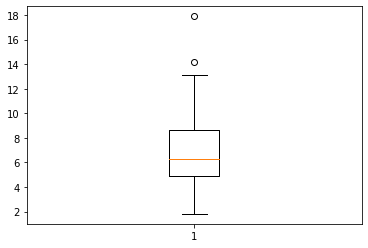

In [693]:
# health
plt.boxplot(df['health'])
plt.savefig('health.png')
plt.show()

In [694]:
# Lets see the health columns with countries having very high value of it.(upper end outliers)
df[df['health'] > 11].sort_values("health", ascending="True")

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
20,Bosnia and Herzegovina,6.9,29.70,11.1,51.3,9720,1.400,76.8,1.31,4610
87,Lesotho,99.7,39.40,11.1,101.0,2380,4.150,46.5,3.30,1170
29,Canada,5.6,29.10,11.3,31.0,40700,2.870,81.3,1.63,47400
81,Kiribati,62.7,13.30,11.3,79.9,1730,1.520,60.7,3.84,1490
44,Denmark,4.1,50.50,11.4,43.6,44000,3.220,79.5,1.87,58000
145,Switzerland,4.5,64.00,11.5,53.3,55500,0.317,82.2,1.52,74600
26,Burundi,93.6,8.92,11.6,39.2,764,12.300,57.7,6.26,231
58,Germany,4.2,42.30,11.6,37.1,40400,0.758,80.1,1.39,41800
102,Moldova,17.2,39.20,11.7,78.5,3910,11.100,69.7,1.27,1630
88,Liberia,89.3,19.10,11.8,92.6,700,5.470,60.8,5.02,327


In [695]:
# After close inspection the countries on the upper spectrum of health column .Some of them are doing very poorly in the
# In the other factors hence it should not be considered for making a good cluster hence we will remove the column from 
# our dataset
df.drop("health",axis=1, inplace=True)

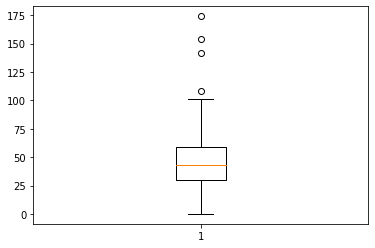

In [696]:
# imports
plt.boxplot(df['imports'])
plt.savefig('imports.png')
plt.show()

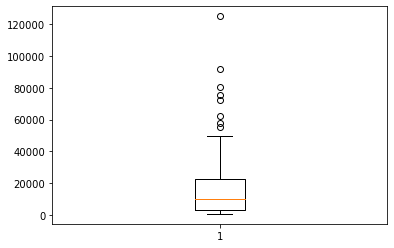

In [697]:
# income
plt.boxplot(df['income'])
plt.savefig('income.png')
plt.show()

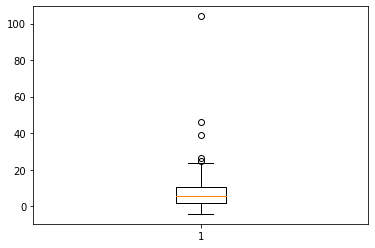

In [698]:
# inflation
plt.boxplot(df['inflation'])
plt.savefig('inflation.png')
plt.show()

In [699]:
# After analysing there are some countries with low inflation rates but with not so good other socio-economic parameter
# and health parameter. so we are not going to mark any outliers in this column.
df[df['inflation'] > 20].sort_values('inflation')

,country,child_mort,exports,imports,income,inflation,life_expec,total_fer,gdpp
38,"Congo, Rep.",63.9,85.1,54.7,5190,20.7,60.4,4.95,2740
37,"Congo, Dem. Rep.",116.0,41.1,49.6,609,20.8,57.5,6.54,334
5,Argentina,14.5,18.9,16.0,18700,20.9,75.8,2.37,10300
3,Angola,119.0,62.3,42.9,5900,22.4,60.1,6.16,3530
140,Sri Lanka,11.2,19.6,26.8,8560,22.8,74.4,2.20,2810
165,Yemen,56.3,30.0,34.4,4480,23.6,67.5,4.67,1310
49,Equatorial Guinea,111.0,85.8,58.9,33700,24.9,60.9,5.21,17100
149,Timor-Leste,62.6,2.2,27.8,1850,26.5,71.1,6.23,3600
103,Mongolia,26.1,46.7,56.7,7710,39.2,66.2,2.64,2650
163,Venezuela,17.1,28.5,17.6,16500,45.9,75.4,2.47,13500


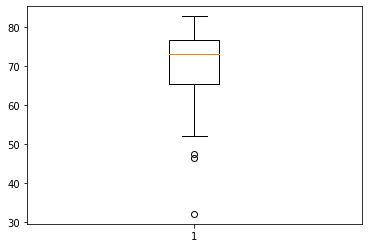

In [700]:
# life_expec
plt.boxplot(df['life_expec'])
plt.savefig('life_expec.png')
plt.show()

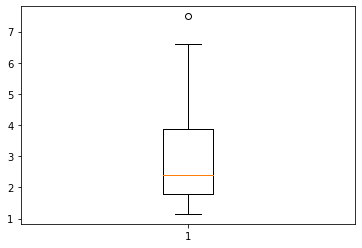

In [701]:
# total_fer
plt.boxplot(df['total_fer'])
plt.savefig('total_fer.png')
plt.show()

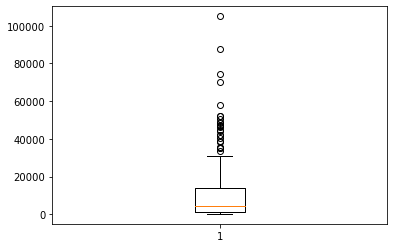

In [702]:
# gdpp
plt.boxplot(df['gdpp'])
plt.savefig('gdpp.png')
plt.show()

In [703]:
df.columns

Index(['country', 'child_mort', 'exports', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

**After studying the above box plot with some domain knownledge and statistical analysis we will start removing the outliers**

In [704]:
# removing (statistical) outliers for child_mort
# Lets see the child_mort columns with countries having very low value of it.(lower end outliers)
# As we can see that the countries having child mortality of less than 5 are also doing very good in the other
# socio-economic and health parameters so for this analysis should be treated as outliers asn should be removed.
df = df[df['child_mort'] > 5]

# removing (statistical) outliers for exports
# As the countries having very high export rate are considered to be doing very good economically does not comes under our-requirement
# So here we should consider (the number is arbitrary as Q1 = 25%, Q3 = 75% will be very high) percentage as upper quartile outliers and remove it from our dataset
Q1 = df.exports.quantile(0.25)
Q3 = df.exports.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.exports <= Q3 + 1.5*IQR)]

# removing (statistical) outliers for income
# As the countries having very high income they should be treated as outliers 
# So here we should consider top 25 (the number is arbitrary as Q1 = 25%, Q3 = 75% will be very high) percentage as and remove it from our dataset
Q1 = df.income.quantile(0.25)
Q3 = df.income.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.income <= Q3 + 1.5*IQR)]

# removing (statistical) outliers for life_expec
# As the countries having very high life expectancy they should be treated as outliers 
# But we are currently not so sure about the life_expec criteria so we will use the Q1 = 8%, Q3 = 92% for outlier analysis
Q1 = df.life_expec.quantile(0.08)
Q3 = df.life_expec.quantile(0.92)
IQR = Q3 - Q1
df = df[(df.life_expec >= Q1 - 1.5*IQR)]

# removing (statistical) outliers for gddp
# As the countries having very high gdpp they should be treated as outliers 
# By looking at the box plot we will remove the outliers as shown in this boxplot
# So here we should consider top 25 (the number is arbitrary as Q1 = 25%, Q3 = 75% will be very high) percentage as and remove it from our dataset
Q1 = df.gdpp.quantile(0.25)
Q3 = df.gdpp.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.gdpp <= Q3 + 1.5*IQR)]


### 1.3 Rescaling
Selecting 'gdpp', 'child_mort ', 'income' from the dataset to apply to the clustering algorithm as the socio-economic

Factors are highly dependent on this variable so applying it to the clustering algorithm to make clusters

In [705]:

new_df = df[['gdpp', 'child_mort', 'income']]

# instantiate
scaler = StandardScaler()

# fit_transform
new_df_scaled = scaler.fit_transform(new_df)
new_df_scaled.shape

(124, 3)

In [706]:
new_df_scaled = pd.DataFrame(new_df_scaled)
new_df_scaled.columns = ['gdpp', 'child_mort', 'income']
new_df_scaled.head()

,gdpp,child_mort,income
0,-0.962542,1.017407,-1.008430
1,-0.006440,-0.782412,0.270267
2,0.093577,-0.520753,0.726725
3,-0.157816,1.721684,-0.349102
4,2.185810,-0.936472,1.679600


## 2.Modeling - Kmeans

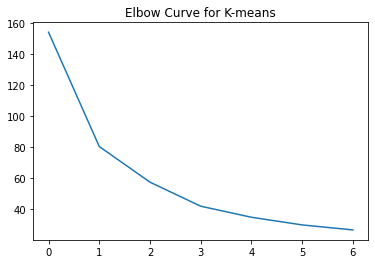

In [707]:
### 2.1 Using K-means 
#### Finding the optimal values of the clusters using Elbow curve
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(new_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.title("Elbow Curve for K-means")
plt.plot(ssd)
plt.savefig('Elbow_curve.png')

#### According to the elbow plot it seems that index=1, k=3 is the optimal value for k-means clustering

In [708]:
# Building final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(new_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [709]:
# assign the label to the countries dataset
new_df_scaled['cluster_id'] = kmeans.labels_
new_df_scaled.head()

,gdpp,child_mort,income,cluster_id
0,-0.962542,1.017407,-1.008430,2
1,-0.006440,-0.782412,0.270267,1
2,0.093577,-0.520753,0.726725,1
3,-0.157816,1.721684,-0.349102,2
4,2.185810,-0.936472,1.679600,0


## 3. Final Analysis
Making the final analysis of the types of clusters formed by the K-means clustering algorithm , and using boxplots for the following gddp and child_mort and income tables

In [710]:
# assign cluster labels to the original dataset- Hierarchical
df['cluster_kmeans'] = kmeans.labels_
df.head()

,country,child_mort,exports,imports,income,inflation,life_expec,total_fer,gdpp,cluster_kmeans
0,Afghanistan,90.2,10.0,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,58.9,19100,1.44,76.8,2.13,12200,0


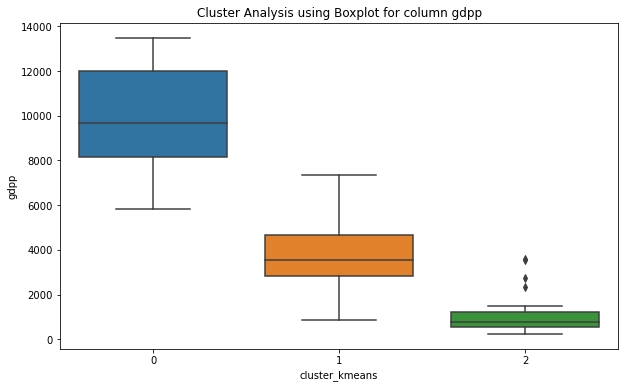

In [711]:
# Cluster Analysis for Boxplot for column for gdpp
plt.figure(figsize=(10,6))
sns.boxplot(x='cluster_kmeans', y='gdpp', data=df)
plt.title("Cluster Analysis using Boxplot for column gdpp")
plt.plot()
plt.savefig('kmeans_Cluster_gdpp.png')

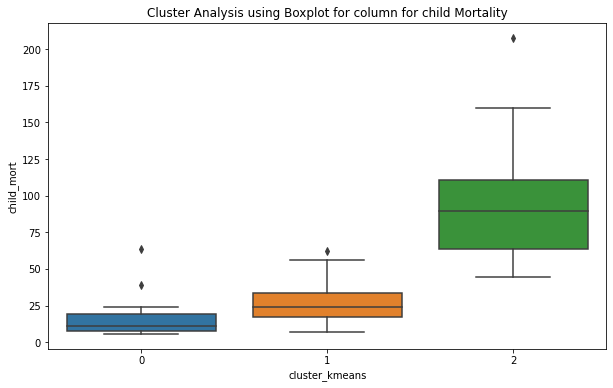

In [712]:
# Cluster Analysis f Boxplot for column for child_mort
plt.figure(figsize=(10,6))
sns.boxplot(x='cluster_kmeans', y='child_mort', data=df)
plt.title("Cluster Analysis using Boxplot for column for child Mortality")
plt.plot()
plt.savefig('kmeans_Cluster_child_mort.png')

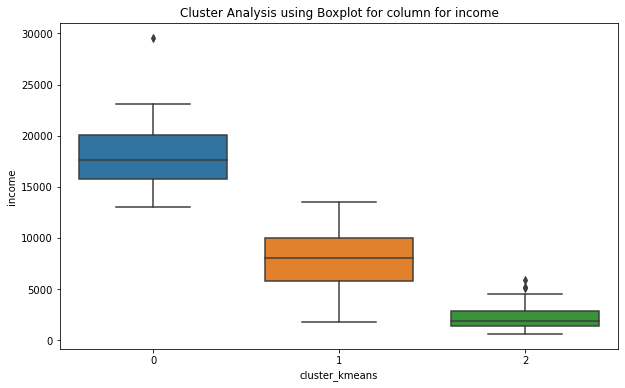

In [713]:
# Cluster Analysis for Boxplot for column for child_mort
plt.figure(figsize=(10,6))
sns.boxplot(x='cluster_kmeans', y='income', data=df)
plt.title("Cluster Analysis using Boxplot for column for income")
plt.plot()
plt.savefig('kmeans_Cluster_income.png')

#### Using the three different clusters to differentiate between developed and under-developed countries .
From the above boxplots it looks like with LOW gddp , HIGH child mortality , and LOW income the cluster 2 is for under-developed countries

Also looks like with HIGH gddp , LOW child mortality , and HIGH income the cluster 0 is for developed countries

And Cluster 1 looks like it is on the middle of everything so it might be on the developing countries one.


## Modeling - Hierarchical Clustering

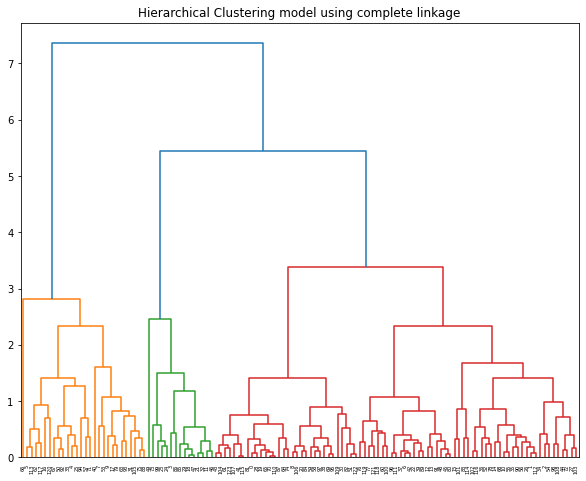

In [714]:
# Creating a Hierarchical Clustering model using complete linkage
plt.figure(figsize=(10,8))
mergings = linkage(new_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.title("Hierarchical Clustering model using complete linkage")
plt.show()

From the above plot we can clearly see that there are mostly three clusters of countires as indicated using the elbow curve in the K-means algorithm

In [715]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 1, 2, 2, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1,
       0, 1, 1, 2, 0, 0, 0, 1, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0,
       2, 2, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0,
       2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0])

In [716]:
# assign cluster labels to the original dataset- Hierarchical
df['cluster_hierarchical'] = cluster_labels
df.head()

,country,child_mort,exports,imports,income,inflation,life_expec,total_fer,gdpp,cluster_kmeans,cluster_hierarchical
0,Afghanistan,90.2,10.0,44.9,1610,9.44,56.2,5.82,553,2,0
1,Albania,16.6,28.0,48.6,9930,4.49,76.3,1.65,4090,1,0
2,Algeria,27.3,38.4,31.4,12900,16.10,76.5,2.89,4460,1,0
3,Angola,119.0,62.3,42.9,5900,22.40,60.1,6.16,3530,2,1
4,Antigua and Barbuda,10.3,45.5,58.9,19100,1.44,76.8,2.13,12200,0,2


[]

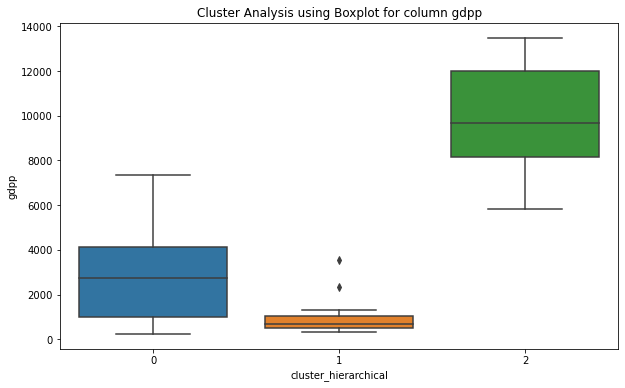

In [717]:
# Cluster Analysis for Boxplot for column for gdpp
plt.figure(figsize=(10,6))
sns.boxplot(x='cluster_hierarchical', y='gdpp', data=df)
plt.title("Cluster Analysis using Boxplot for column gdpp")
plt.plot()

[]

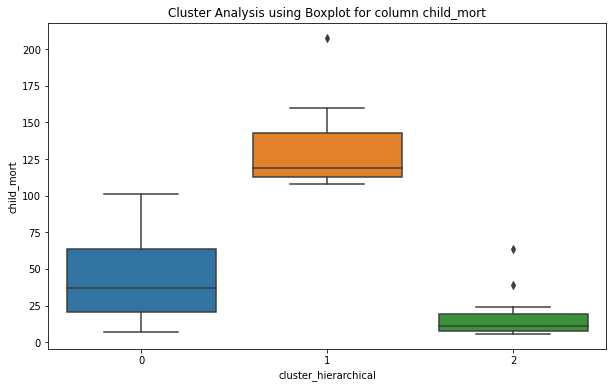

In [718]:
# Cluster Analysis for Boxplot for column for child_mort
plt.figure(figsize=(10,6))
sns.boxplot(x='cluster_hierarchical', y='child_mort', data=df)
plt.title("Cluster Analysis using Boxplot for column child_mort")
plt.plot()

[]

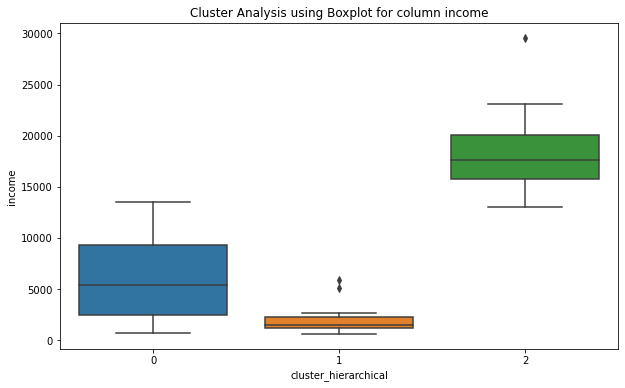

In [719]:
# Cluster Analysis for Boxplot for column for gdpp
plt.figure(figsize=(10,6))
sns.boxplot(x='cluster_hierarchical', y='income', data=df)
plt.title("Cluster Analysis using Boxplot for column income")
plt.plot()

From the three clusters above we can clearly see that the cluster 1 is for the under-developed countrries and cluster-2 is for the developed countries.

In [720]:
df.head()

,country,child_mort,exports,imports,income,inflation,life_expec,total_fer,gdpp,cluster_kmeans,cluster_hierarchical
0,Afghanistan,90.2,10.0,44.9,1610,9.44,56.2,5.82,553,2,0
1,Albania,16.6,28.0,48.6,9930,4.49,76.3,1.65,4090,1,0
2,Algeria,27.3,38.4,31.4,12900,16.10,76.5,2.89,4460,1,0
3,Angola,119.0,62.3,42.9,5900,22.40,60.1,6.16,3530,2,1
4,Antigua and Barbuda,10.3,45.5,58.9,19100,1.44,76.8,2.13,12200,0,2


In [726]:
# Using kmeans result to find the top 5 countries which are in the utmost need for help
df[df['cluster_kmeans'] == 2].shape

(47, 11)

In [727]:
# As we can see the in the under-developed countries cluster there are 47 countries from here we have to find
# 5 countries which in the most need for help to the CEO of the HELP company
df[df['cluster_kmeans'] == 2].head()

,country,child_mort,exports,imports,income,inflation,life_expec,total_fer,gdpp,cluster_kmeans,cluster_hierarchical
0,Afghanistan,90.2,10.0,44.9,1610,9.440,56.2,5.82,553,2,0
3,Angola,119.0,62.3,42.9,5900,22.400,60.1,6.16,3530,2,1
12,Bangladesh,49.4,16.0,21.8,2440,7.140,70.4,2.33,758,2,0
17,Benin,111.0,23.8,37.2,1820,0.885,61.8,5.36,758,2,1
25,Burkina Faso,116.0,19.2,29.6,1430,6.810,57.9,5.87,575,2,1


In [728]:
countries_temp = df[df['cluster_kmeans'] == 2].sort_values(by=['gdpp','income'], ascending=True).head(20)

In [729]:
countries_temp

,country,child_mort,exports,imports,income,inflation,life_expec,total_fer,gdpp,cluster_kmeans,cluster_hierarchical
26,Burundi,93.6,8.92,39.2,764,12.30,57.7,6.26,231,2,0
88,Liberia,89.3,19.10,92.6,700,5.47,60.8,5.02,327,2,0
37,"Congo, Dem. Rep.",116.0,41.10,49.6,609,20.80,57.5,6.54,334,2,1
112,Niger,123.0,22.20,49.1,814,2.55,58.8,7.49,348,2,1
132,Sierra Leone,160.0,16.80,34.5,1220,17.20,55.0,5.20,399,2,1
93,Madagascar,62.2,25.00,43.0,1390,8.79,60.8,4.60,413,2,0
106,Mozambique,101.0,31.50,46.2,918,7.64,54.5,5.56,419,2,0
31,Central African Republic,149.0,11.80,26.5,888,2.01,47.5,5.21,446,2,1
94,Malawi,90.5,22.80,34.9,1030,12.10,53.1,5.31,459,2,0
50,Eritrea,55.2,4.79,23.3,1420,11.60,61.7,4.61,482,2,0


In [730]:
countries_temp.sort_values(by=['child_mort'], ascending=False).head(10)

,country,child_mort,exports,imports,income,inflation,life_expec,total_fer,gdpp,cluster_kmeans,cluster_hierarchical
66,Haiti,208.0,15.30,64.7,1500,5.45,32.1,3.33,662,2,1
132,Sierra Leone,160.0,16.80,34.5,1220,17.20,55.0,5.20,399,2,1
31,Central African Republic,149.0,11.80,26.5,888,2.01,47.5,5.21,446,2,1
112,Niger,123.0,22.20,49.1,814,2.55,58.8,7.49,348,2,1
37,"Congo, Dem. Rep.",116.0,41.10,49.6,609,20.80,57.5,6.54,334,2,1
25,Burkina Faso,116.0,19.20,29.6,1430,6.81,57.9,5.87,575,2,1
64,Guinea-Bissau,114.0,14.90,35.2,1390,2.97,55.6,5.05,547,2,1
63,Guinea,109.0,30.30,43.2,1190,16.10,58.0,5.34,648,2,1
106,Mozambique,101.0,31.50,46.2,918,7.64,54.5,5.56,419,2,0
26,Burundi,93.6,8.92,39.2,764,12.30,57.7,6.26,231,2,0


According the above table **Haiti, Niger, Central African Republic, Burundi, Congo, Dem. Rep.** are the countries with respect to different criterias like 

    1. Haiti-having highest child mortality and lowest life expectancy
    2. Burundi having the lowest gdpp
    3. Congo, Dem. Rep having the lowest income
    4. Central African Republic has second highest child_mort rate, second lowest income 
    5. Niger has very high child mortality rate, very low gdpp, very income.